Create the graphics needed for the January 2023 discussion with Chief Avierett.
Goals:
1. Show stops by month over time, by type
2. Show stops per capita by race

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../code")
import plotting.lare_matplot as lmp

In [2]:
import loaders.losaltos as lla

In [3]:
df_list = lla.read_csv_list(["LAPD_RIPA_DATA_202101_202206.csv", "LAPD_RIPA_DATA_2022.csv", "LAPD_RIPA_DATA_2023.csv"], dir="../data/clean_data/")

In [4]:
df_final = lla.load_ripa_data(["LAPD_RIPA_DATA_202101_202206.csv", "LAPD_RIPA_DATA_2022.csv", "LAPD_RIPA_DATA_2023.csv"], verbose=True)

Records: 2969 Stop IDs: [55, 4841]  Date Range: [2021-02-01 10:39:00, 2022-06-26 15:06:00]
Records: 1660 Stop IDs: [3106, 5742]  Date Range: [2022-01-02 19:11:00, 2022-12-31 19:18:00]
Records: 880 Stop IDs: [5743, 6616]  Date Range: [2023-01-01 22:30:00, 2023-06-30 22:42:00]


In [5]:
df = df_final.drop_duplicates(subset="stop_id", keep="last")

In [6]:
len(df)

4713

In [7]:
reasons = set([a.strip() for b in df['reason_for_stop'].str.split(';').values for a in b])

In [8]:
reasons

{'Consensual Encounter resulting in a search',
 'Investigation to determine whether the person was truant',
 'Knowledge of outstanding arrest warrant/wanted person',
 'Known to be on Parole / Probation / PRCS / Mandatory Supervision',
 'Reasonable Suspicion',
 'Traffic Violation'}

In [9]:
monthly = {k: df[df["reason_for_stop"] == k].groupby(pd.Grouper(key="date_time", freq="M")) for k in reasons}

In [10]:
monthly_df = pd.DataFrame({k: monthly[k].count()["stop_id"] for k in reasons}).fillna(0)

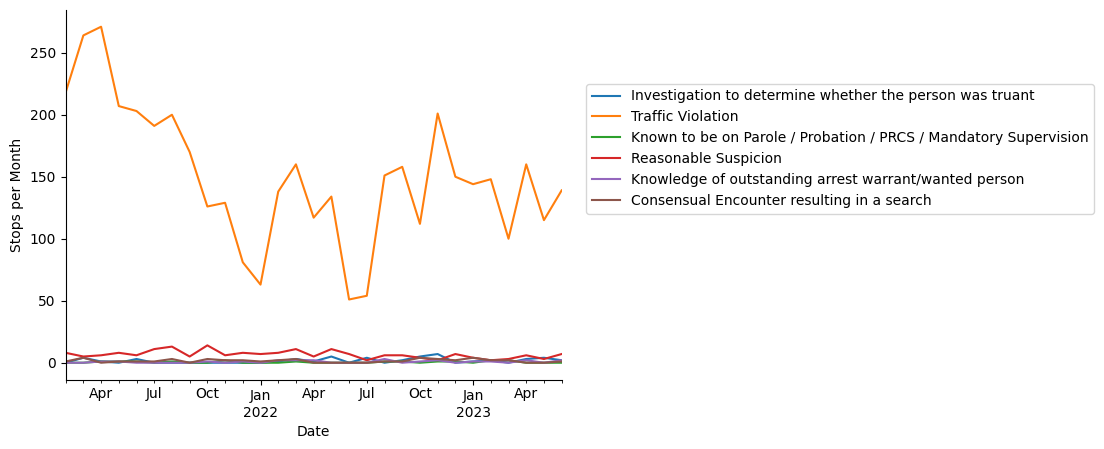

In [11]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("Stops_over_time.png", bbox_inches="tight")

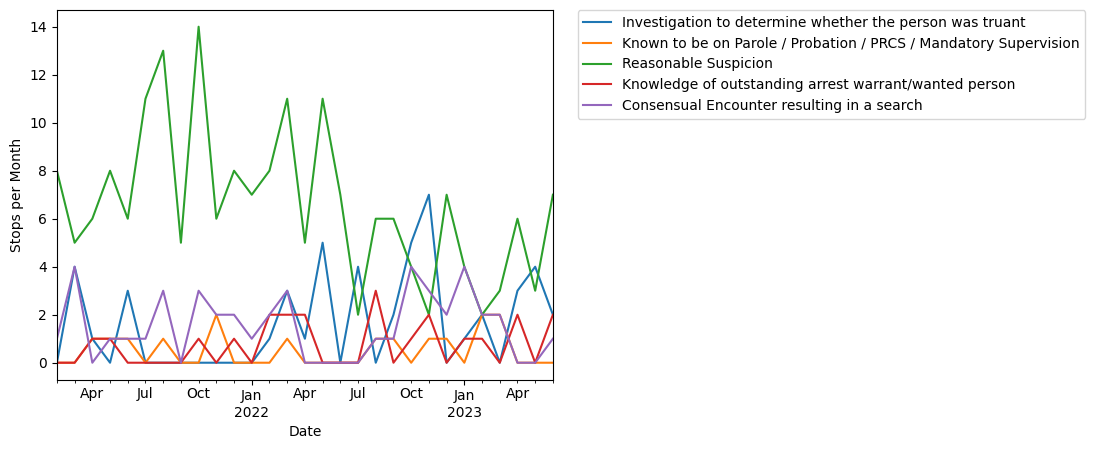

In [12]:
ax2= monthly_df.drop("Traffic Violation", axis=1).plot()
ax2.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("Non_traffic_stops_over_time.png", bbox_inches="tight")

In [13]:
races = set([a.strip() for b in df['race'].str.split(';').values for a in b])

In [14]:
monthly_races = monthly = {k: df[df["race"] == k].groupby(pd.Grouper(key="date_time", freq="M")) for k in races}

In [15]:
monthly_races_df = pd.DataFrame({k: monthly_races[k].count()["stop_id"] for k in races}).fillna(0)

In [16]:
monthly_races_df

,Black/African American,Native American,Middle Eastern or South Asian,Asian,Hispanic/Latino/a,Pacific Islander,White
date_time,,,,,,,
2021-02-28,9,0.0,19,35,51,2,111
2021-03-31,15,0.0,36,55,64,6,96
2021-04-30,9,1.0,27,41,75,4,118
2021-05-31,9,1.0,30,25,64,5,82
2021-06-30,7,2.0,31,50,38,3,82
2021-07-31,7,1.0,34,34,32,3,92
2021-08-31,10,0.0,35,38,36,6,87
2021-09-30,6,1.0,30,32,29,3,72
2021-10-31,7,3.0,13,21,30,6,62


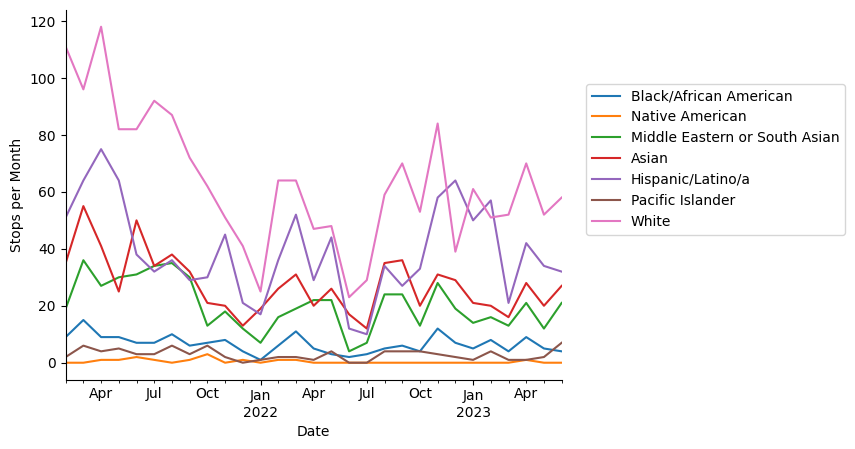

In [17]:
ax = monthly_races_df.plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
plt.savefig("stops over time by race.png", bbox_inches="tight")

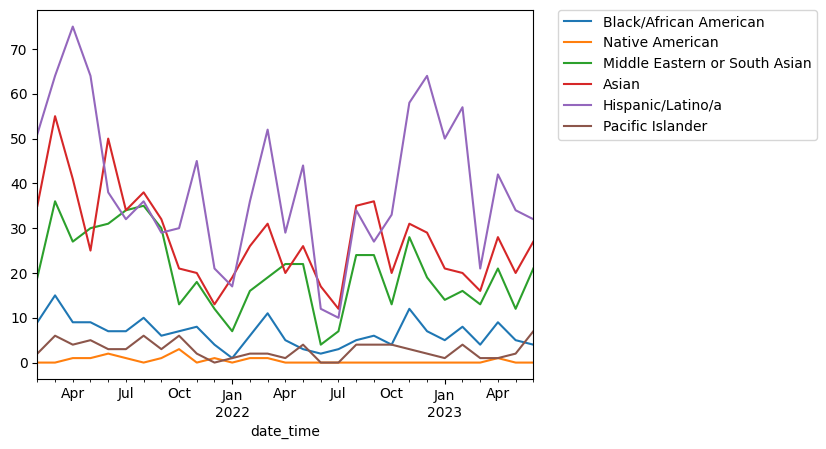

In [18]:
ax2= monthly_races_df.drop("White", axis=1).plot()
ax.set(xlabel="Date", ylabel="Stops per Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#plt.savefig("stops over time by race, exWhite.png", bbox_inches="tight")

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

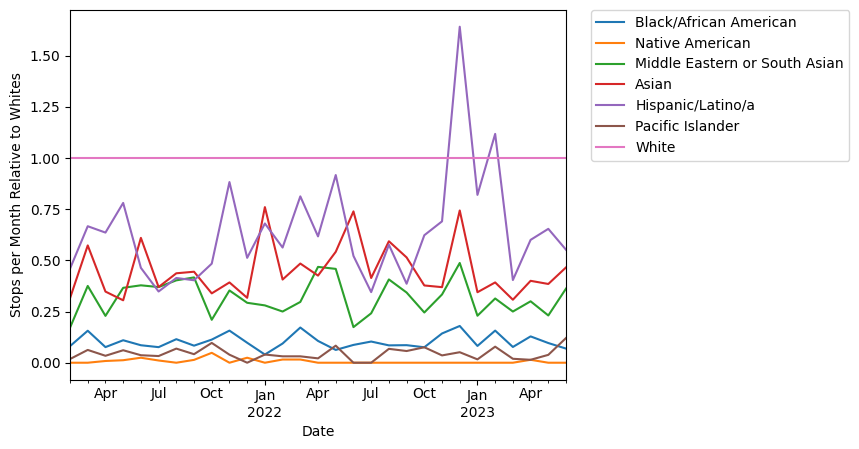

In [19]:
ax = monthly_races_df.div(monthly_races_df.White, axis=0).plot()
ax.set(xlabel="Date", ylabel="Stops per Month Relative to Whites")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.despine
#plt.savefig("stops over time by race relWhite.png", bbox_inches="tight")

In [20]:
import analysis.populations as pop

In [21]:
la_pop = pop.get_population("Los Altos")

In [22]:
df["race"].value_counts()

race
White                                                                      1843
Hispanic/Latino/a                                                          1137
Asian                                                                       798
Middle Eastern or South Asian                                               587
Black/African American                                                      191
Pacific Islander                                                             83
Hispanic/Latino/a; White                                                     19
Native American                                                              13
Asian; White                                                                  6
Middle Eastern or South Asian; White                                          5
Black/African American; White                                                 4
Asian; Hispanic/Latino/a                                                      4
Asian; Middle Eastern or South Asia

In [23]:
statsig_races = {"White", "Hispanic/Latino/a", "Asian", "Middle Eastern or South Asian", "Black/African American"}

In [24]:
ss_df = df[df["race"].isin(statsig_races)]

In [25]:
raw_stops = ss_df["race"].value_counts()

In [26]:
stops_per_hundred_per_year = 100*ss_df["race"].value_counts()/la_pop[la_pop.index.isin(statsig_races)]/1.5

In [27]:
stops_per_capita_relative_to_white= ss_df["race"].value_counts()/la_pop[la_pop.index.isin(statsig_races)]/(ss_df["race"].value_counts()["White"]/la_pop["White"])

In [28]:
monthly_races_per_capita = monthly_races_df/la_pop[la_pop.index.isin(statsig_races)]

In [29]:
monthly_stops_per_capita_relative_to_white= monthly_races_per_capita.div(monthly_races_per_capita["White"], axis=0)

In [30]:
monthly_stops_per_capita_relative_to_white

,Asian,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White
date_time,,,,,,,
2021-02-28,0.803112,9.917055,6.004800,1.157373,NaN,NaN,1.0
2021-03-31,1.459226,19.110991,8.712847,2.535560,NaN,NaN,1.0
2021-04-30,0.884979,9.328755,8.306740,1.547122,NaN,NaN,1.0
2021-05-31,0.776528,13.424306,10.200406,2.473717,NaN,NaN,1.0
2021-06-30,1.553057,10.441127,6.056491,2.556175,NaN,NaN,1.0
2021-07-31,0.941287,9.306222,4.545833,2.498813,NaN,NaN,1.0
2021-08-31,1.112488,14.058660,5.407974,2.720141,NaN,NaN,1.0
2021-09-30,1.132006,10.192529,5.264012,2.817289,NaN,NaN,1.0
2021-10-31,0.862698,13.809232,6.323841,1.417733,NaN,NaN,1.0


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

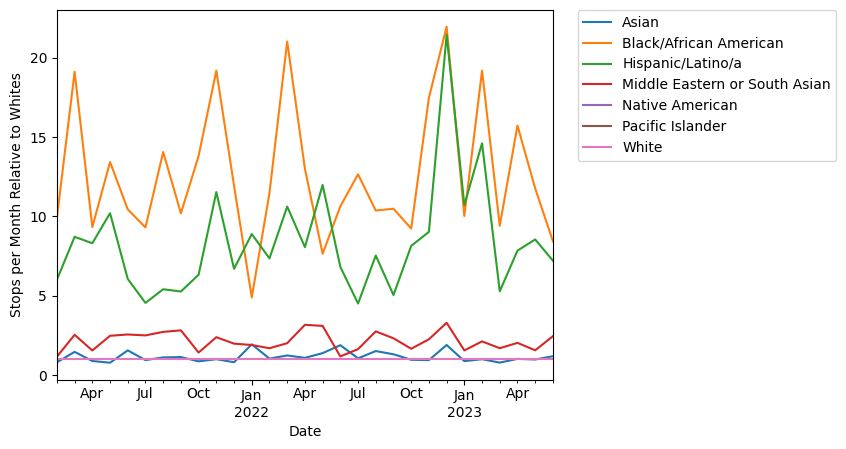

In [31]:
ax = monthly_stops_per_capita_relative_to_white.plot()
ax.set(xlabel="Date", ylabel="Stops per Month Relative to Whites")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.despine
#plt.savefig("stops over time by race relWhite.png", bbox_inches="tight")

In [32]:
stops_df = pd.DataFrame({"raw_stops": raw_stops, 
                         "stops_per_hundred_per_year": stops_per_hundred_per_year,
                         "stops_per_capita_relative_to_white": stops_per_capita_relative_to_white})

In [33]:
stops_df

,raw_stops,stops_per_hundred_per_year,stops_per_capita_relative_to_white
race,,,
White,1843,6.927920,1.000000
Hispanic/Latino/a,1137,55.858511,8.062811
Asian,798,7.640320,1.102830
Middle Eastern or South Asian,587,14.919640,2.153552
Black/African American,191,87.816092,12.675679


In [53]:
stops_df["required_population"] = {race: (stops_df["stops_per_capita_relative_to_white"].loc[race])*la_pop[race] for race in stops_df.index}

In [55]:
pretty_names = {"raw_stops": "Total Stops",
                "stops_per_hundred_per_year": "Stops per hundred per year",
                "stops_per_capita_relative_to_white": "Relative per capita rate",
                "required_population": "Transient population required to equalize stops"}

def make_pretty(styler):
    styler.format(formatter="{:.2f}", subset=pretty_names["stops_per_capita_relative_to_white"])
    styler.format(formatter="{:.1f}", subset=pretty_names["stops_per_hundred_per_year"])
    styler.format(formatter="{:.0f}", subset=pretty_names["required_population"])
    return styler



In [56]:
df_styled = stops_df.rename(columns=pretty_names).style.pipe(make_pretty)

In [57]:
df_styled

,Total Stops,Stops per hundred per year,Relative per capita rate,Transient population required to equalize stops
race,,,,
White,1843,6.9,1.00,17735
Hispanic/Latino/a,1137,55.9,8.06,10941
Asian,798,7.6,1.10,7679
Middle Eastern or South Asian,587,14.9,2.15,5649
Black/African American,191,87.8,12.68,1838


In [58]:
df_styled.to_html()

'<style type="text/css">\n</style>\n<table id="T_c52e7">\n  <thead>\n    <tr>\n      <th class="blank level0" >&nbsp;</th>\n      <th id="T_c52e7_level0_col0" class="col_heading level0 col0" >Total Stops</th>\n      <th id="T_c52e7_level0_col1" class="col_heading level0 col1" >Stops per hundred per year</th>\n      <th id="T_c52e7_level0_col2" class="col_heading level0 col2" >Relative per capita rate</th>\n      <th id="T_c52e7_level0_col3" class="col_heading level0 col3" >Transient population required to equalize stops</th>\n    </tr>\n    <tr>\n      <th class="index_name level0" >race</th>\n      <th class="blank col0" >&nbsp;</th>\n      <th class="blank col1" >&nbsp;</th>\n      <th class="blank col2" >&nbsp;</th>\n      <th class="blank col3" >&nbsp;</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th id="T_c52e7_level0_row0" class="row_heading level0 row0" >White</th>\n      <td id="T_c52e7_row0_col0" class="data row0 col0" >1843</td>\n      <td id="T_c52e7_row0_col1" cl